# Marketing Campaign Analysis 

**Project Objective**: Checking the performance of campaigns on different marketing channels among control & experiment groups and also among different age groups and investigate reasons for high performance or underperformance of channels.

**Dataset**:  Data is for 1 month (1st-31st January) & important variables are marketing channel, ad display language, user preferred language, age group, subscribing channel etc.

**Methodolgy**: In my analysis I have calculated & plotted conversion rates across channels, age groups, control/experiment group and days of the week to gauge the performance and derive insights. And after that have done A/B testing to validate the inferences/insights.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [209]:
df = pd.read_csv("marketing.csv")
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Data cleaning : Analysing individual columsn and fixing data types

In [211]:
## User ID

id_len = df['user_id'].apply(lambda x: len(x))
id_len.unique() ## id length of 9 or 10

array([10,  9], dtype=int64)

In [212]:
len(id_len.unique())

2

In [213]:
## lets check if the user_id values always starts with 'a'

df['user_id'].astype(str).str[0].unique()

array(['a'], dtype=object)

In [214]:
## lets next check the date served

# format ( mm/dd/yy)
df['date_served'] = pd.to_datetime(df['date_served'])
df['date_served'].head()


C:\Users\SuryaMurugan\AppData\Local\Temp\ipykernel_27948\194544270.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_served'] = pd.to_datetime(df['date_served'])


0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: date_served, dtype: datetime64[ns]

In [215]:
## lets convert categorial/boolena values into encoding

df['converted'] = df['converted'].replace(to_replace=['True', 'False'], value=[1,0]).astype('float64')
df['is_retained']=df['is_retained'].replace(to_replace=["True","False"], value=[1,0]).astype('float64')

In [216]:
## age group
df['age_group'].value_counts()

age_group
19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: count, dtype: int64

In [217]:
df['age_group'] = df['age_group'].str.replace(" years","")
df['age_group'].value_counts()

age_group
19-24    1682
24-30    1568
0-18     1539
30-36    1355
36-45    1353
45-55    1353
55+      1187
Name: count, dtype: int64

In [218]:
## date subscribed and date cancelled
df['date_subscribed']=pd.to_datetime(df['date_subscribed']) ## add format if required for latest version of pandas
df['date_canceled']=pd.to_datetime(df['date_canceled'])

C:\Users\SuryaMurugan\AppData\Local\Temp\ipykernel_27948\3052426176.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_subscribed']=pd.to_datetime(df['date_subscribed']) ## add format if required for latest version of pandas
C:\Users\SuryaMurugan\AppData\Local\Temp\ipykernel_27948\3052426176.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_canceled']=pd.to_datetime(df['date_canceled'])


In [219]:
# creating day of week for subscription for anaysis
df['DOW_subscribed'] = df['date_subscribed'].dt.day_of_week # dt.day_name()
df['DOW_subscribed'].value_counts()

DOW_subscribed
1.0    386
2.0    352
0.0    306
3.0    226
4.0    199
6.0    196
5.0    191
Name: count, dtype: int64

In [220]:
# can also use dt.day_name() also direclty in above code
weekday_dict = { 0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [221]:
df['DOW_subscribed'] = df['DOW_subscribed'].map(weekday_dict)
df['DOW_subscribed'].value_counts()


DOW_subscribed
Tues    386
Wed     352
Mon     306
Thu     226
Fri     199
Sun     196
Sat     191
Name: count, dtype: int64

In [222]:
## Lets analyse Marketing channel
df['marketing_channel'].value_counts()

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: count, dtype: int64

In [223]:
## variant
df['variant'].value_counts()

variant
control            5091
personalization    4946
Name: count, dtype: int64

In [224]:
## language
df['language_displayed'].value_counts()

language_displayed
English    9793
Spanish     136
German       81
Arabic       27
Name: count, dtype: int64

In [225]:
df['language_preferred'].value_counts()

language_preferred
English    9275
Spanish     450
German      167
Arabic      145
Name: count, dtype: int64

In [226]:
## lets find out how many displayed language is same as preferred

df['is_language_correct'] =df['language_displayed'] == df['language_preferred']
Not_correct = df['is_language_correct'].count() - df['is_language_correct'].sum()
# count : total values | .sum : only true (1) values -> total - true = false
print(f"Language is not correct for {Not_correct} observations")

Language is not correct for 522 observations


In [227]:
## lets now check the data after clearning
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW_subscribed,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,True
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,True
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,True
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,True
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,True


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  float64       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   float64       
 12  DOW_subscribed       1856 non-null   object        
 13  is_language_correct  10037 non-

## EDA

In [229]:
## Daily Marketing Reach by Channel
unique_users = df['user_id'].nunique()

unique_users_converted = df.loc[df['converted']==1, 'user_id'].nunique() # unique-> shows all unique values, nunique -> number (similar to len(x) )
unique_users
print(f"Unique Total user: {unique_users}")
print(f"Unique user converted: {unique_users_converted}")


Unique Total user: 7309
Unique user converted: 1015


In [230]:
## Marketing channel analysis

channel_count = df['marketing_channel'].value_counts()
channel_count

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: count, dtype: int64

In [231]:
channel_count.index

Index(['House Ads', 'Instagram', 'Facebook', 'Push', 'Email'], dtype='object', name='marketing_channel')

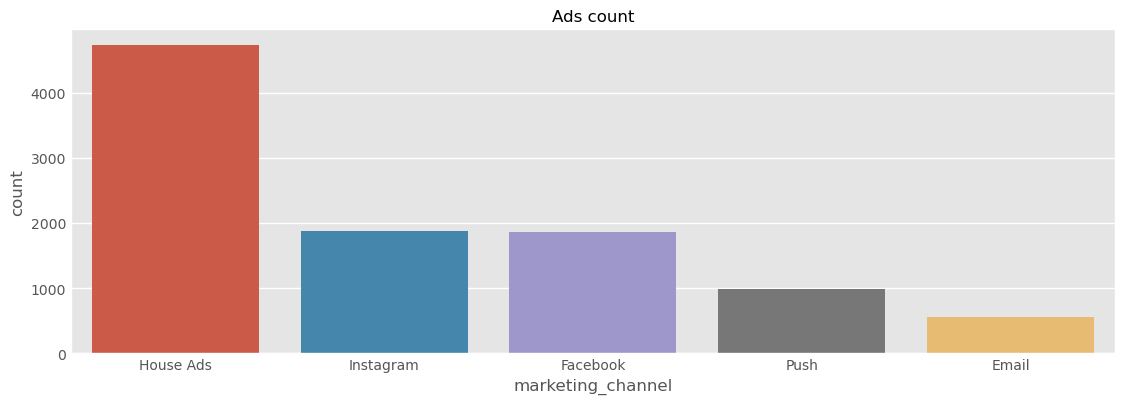

In [232]:
plt.figure(figsize=(12,4))
ax= sns.countplot(x = 'marketing_channel', data=df, order=channel_count.index)
# plt.xlabel("")
plt.title('Ads count', fontsize=12)
plt.show()

In [233]:
## pivoting the ads count by channel

daily_ads_count = df.pivot_table(values='user_id', index='date_served', columns='marketing_channel', aggfunc=len)
daily_ads_count.head(10)


marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1,69,191,78,36
2018-01-02,4,64,250,63,36
2018-01-03,2,63,220,66,37
2018-01-04,2,66,168,64,36
2018-01-05,1,64,160,70,36
2018-01-06,5,64,152,65,29
2018-01-07,3,52,132,60,34
2018-01-08,1,67,154,65,32
2018-01-09,2,59,157,60,37


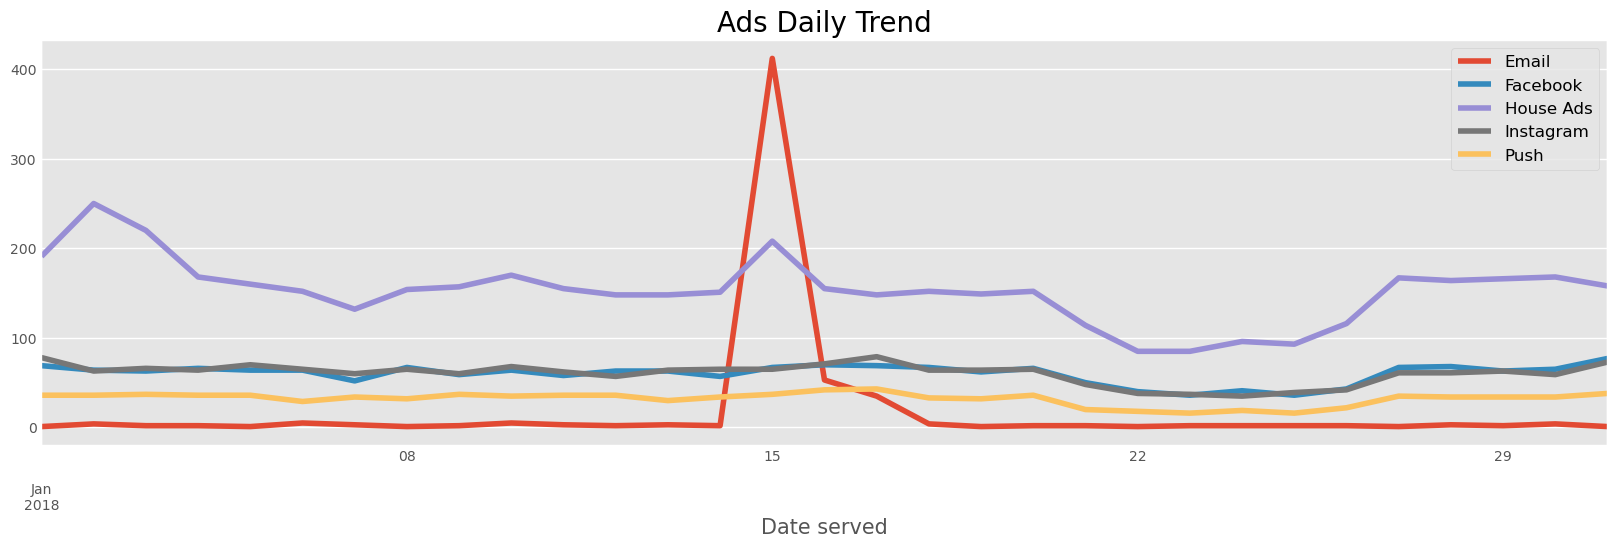

In [234]:
# plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line', figsize=(18,5))
plt.xlabel('Date served', fontsize=15)
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12)

- There was an **Email Blast** on 15th of the month and has been negligible otherwise


- House ads are bulk of the chunk but has been fluctauting 


- Facebook, Insta and Push ads have remained flat throughout the month

In [235]:
## now les check the converion rates

conversions_df= df.groupby('marketing_channel')['converted'].sum() ## people only converted
ads = df.groupby('marketing_channel')['converted'].count()  ## total number of poeple (both convertd and not)
conversion_df = pd.concat([conversions_df,ads], axis=1)
conversion_df

,converted,converted
marketing_channel,,
Email,193.0,565
Facebook,237.0,1860
House Ads,298.0,4733
Instagram,265.0,1871
Push,83.0,993


In [236]:
## lets rename the columns
conversion_df.columns = ['conversions','ads_served']

In [237]:
## now lets find the conversion_rate

conversion_df['conversion_rate'] = conversion_df['conversions']/ conversion_df['ads_served']
conversion_df

,conversions,ads_served,conversion_rate
marketing_channel,,,
Email,193.0,565,0.341593
Facebook,237.0,1860,0.127419
House Ads,298.0,4733,0.062962
Instagram,265.0,1871,0.141635
Push,83.0,993,0.083585


**Overall email has high conversion rate and seems like house ads which are highest of the lot has least conversion rate, so why ad allocation towards a low converting channel is hightest needs to be checked.**

## Dividing into Control and Experimen groups

In [238]:
conversions = df.groupby(['variant', 'marketing_channel'])['converted'].sum()
ads = df.groupby(['variant','marketing_channel'])['converted'].count()

conversion_df = pd.concat([conversions, ads], axis=1)
conversion_df

converted  converted
variant         marketing_channel                      
control         Email                   80.0        274
                Facebook                52.0        894
                House Ads              172.0       2552
                Instagram               52.0        888
                Push                    15.0        468
personalization Email                  113.0        291
                Facebook               185.0        966
                House Ads              126.0       2181
                Instagram              213.0        983
                Push                    68.0        525

In [239]:
conversion_df.columns=['conversions','ads_served']
conversion_df['conversion_rate']= round(conversion_df['conversions']/conversion_df['ads_served'],2)
conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [240]:
# print(conversion_df['conversions'].sum(level=0)) ## pandas does not support ths now. use below code instead
print(conversion_df['conversions'].groupby(level=0).sum()) ## here we look at the first index (variant)
print('--'*40)
print(conversion_df['ads_served'].groupby(level=0).sum())

variant
control            371.0
personalization    705.0
Name: conversions, dtype: float64
--------------------------------------------------------------------------------
variant
control            5076
personalization    4946
Name: ads_served, dtype: int64


**Personalization group has very high conversions compared to control group for same number of ads, Distribution of ads by channel below show both groups had more or less same number of ads per channel**

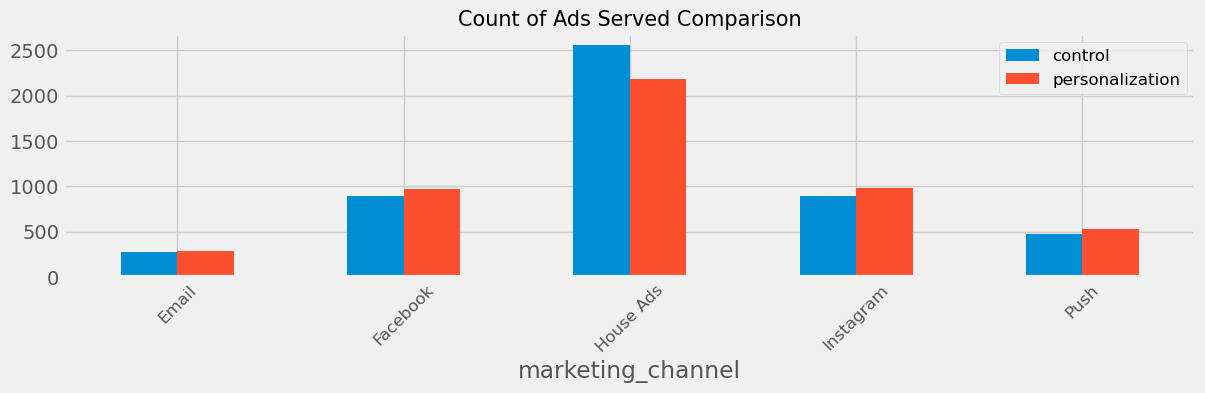

In [241]:
plt.style.use('fivethirtyeight')
conversion_df.unstack(level=0).plot(kind='bar', y='ads_served', figsize=(13,3))
plt.title("Count of Ads Served Comparison",size=15)

plt.xticks(rotation=45, size=12)
# plt.xlabel("")
plt.legend(loc='upper right',fontsize=12)
plt.show()

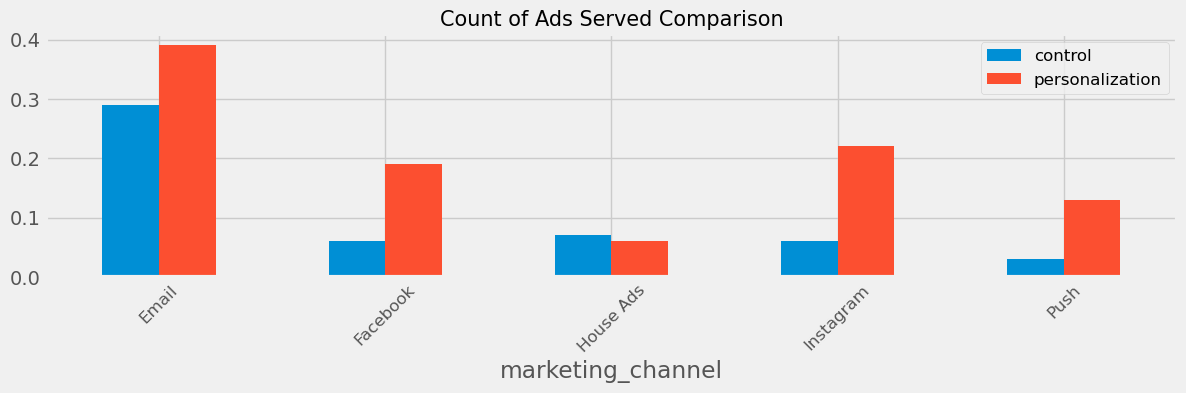

In [242]:
plt.style.use('fivethirtyeight')
conversion_df.unstack(level=0).plot(kind='bar', y='conversion_rate', figsize=(13,3))
plt.title("Count of Ads Served Comparison",size=15)

plt.xticks(rotation=45, size=12)
# plt.xlabel("")
plt.legend(loc='upper right',fontsize=12)
plt.show()

## Retention rate

In [243]:
converted_df = df[df['converted']==1]

In [244]:
total_subs = converted_df['user_id'].nunique()
retained_subs = converted_df.loc[converted_df['is_retained']==1]['user_id'].nunique()

Percentage_diff = retained_subs /  total_subs


print(f"Retention Rate: {round(Percentage_diff * 100, 1)}")
# print("Retention Rate: {}%".format(100*round(retained_subs/total_subs,1))) ## not 60%

Retention Rate: 64.5


## Conversion Analysis by Age group

In [245]:
age_df = df.pivot_table(values='user_id', index=['marketing_channel','converted'], columns=['age_group'], aggfunc=len)
age_df

age_group                    0-18  19-24  24-30  30-36  36-45  45-55  55+
marketing_channel converted                                              
Email             0.0          54     59     68     47     51     50   43
                  1.0          39     52     52     13     12     15   10
Facebook          0.0         215    269    247    228    213    290  161
                  1.0          49     78     49     21     13      9   18
House Ads         0.0         636    703    623    668    558    647  600
                  1.0          58     58     58     31     31     31   31
Instagram         0.0         261    214    230    246    261    207  187
                  1.0          39    101     56     13     19     20   17
Push              0.0         170    120    160     82    190     77  111
                  1.0          16     25     23      4      3      5    7

In [246]:
## conversion function

def conversion_rate(df, column_names):

    # Total number of converted users
    column_conv = df[df['converted']==1].groupby(column_names)['user_id'].nunique()

    # Total number of users
    column_total = df.groupby(column_names)['user_id'].nunique()

    # conversion rate
    conversion_rate = round(column_conv / column_total, 2)

    #Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)

    return conversion_rate

In [247]:
age_group_convRate = conversion_rate(df,['marketing_channel','age_group'])
age_group_convRate

marketing_channel  age_group
Email              0-18         0.41
                   19-24        0.46
                   24-30        0.45
                   30-36        0.22
                   36-45        0.19
                   45-55        0.22
                   55+          0.19
Facebook           0-18         0.17
                   19-24        0.23
                   24-30        0.17
                   30-36        0.07
                   36-45        0.06
                   45-55        0.03
                   55+          0.09
House Ads          0-18         0.10
                   19-24        0.09
                   24-30        0.10
                   30-36        0.05
                   36-45        0.06
                   45-55        0.05
                   55+          0.06
Instagram          0-18         0.13
                   19-24        0.31
                   24-30        0.19
                   30-36        0.05
                   36-45        0.06
         

In [248]:
age_group_conv_df = pd.DataFrame(age_group_convRate.unstack(level=0))
age_group_conv_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18,0.41,0.17,0.10,0.13,0.08
19-24,0.46,0.23,0.09,0.31,0.17
24-30,0.45,0.17,0.10,0.19,0.11
30-36,0.22,0.07,0.05,0.05,0.05
36-45,0.19,0.06,0.06,0.06,0.02
45-55,0.22,0.03,0.05,0.07,0.06
55+,0.19,0.09,0.06,0.07,0.05


Text(0.5, 0, 'Age group')

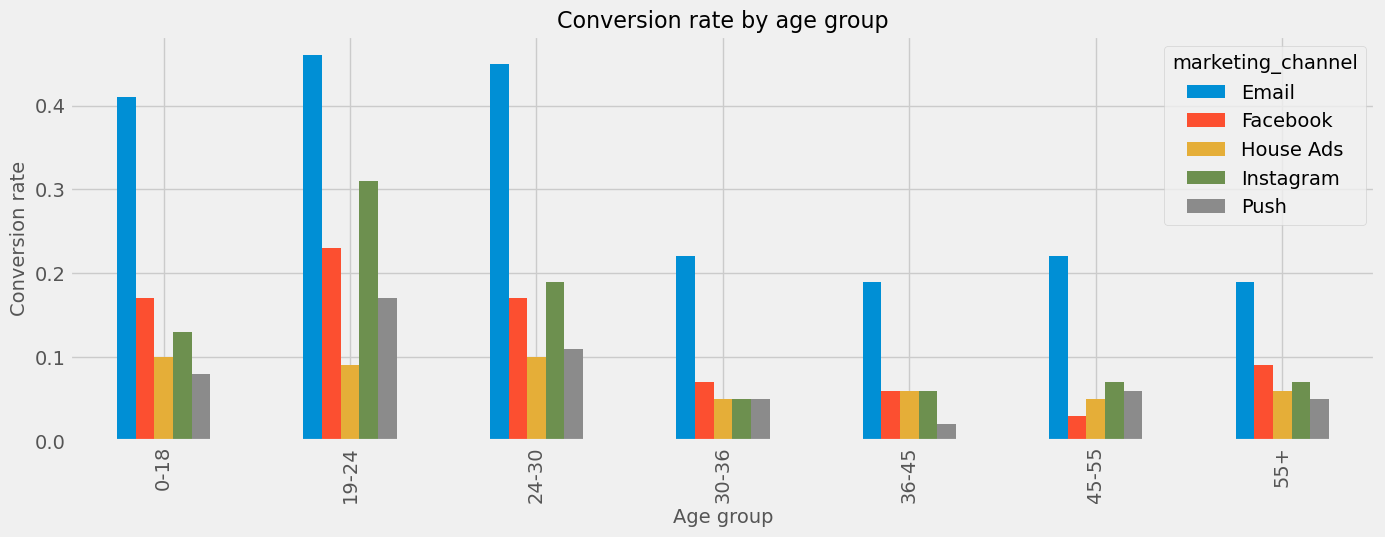

In [249]:
plt.style.use('fivethirtyeight')
age_group_conv_df.plot(kind='bar',figsize=(15,5))


plt.title('Conversion rate by age group', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)

- Young age grouups upto 24-30 has high converion rates for across all channels compared to 30-36 & older groups

- House ads have low conversion rates even among young groups

## Conversion Analysis by channel

In [250]:
channel_conv_df = pd.DataFrame(conversion_rate(df, ['date_served','marketing_channel']).unstack(level=1))
channel_conv_df.head(10) # we have Nan values, to hanlde lets fill na with 0 in conversion_rate function

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.12,0.08,0.11,0.08
2018-01-02,1.0,0.10,0.08,0.13,0.06
2018-01-03,0.0,0.08,0.09,0.17,0.08
2018-01-04,0.5,0.14,0.09,0.13,0.06
2018-01-05,1.0,0.11,0.13,0.16,0.03
2018-01-06,0.6,0.11,0.11,0.10,0.07
2018-01-07,1.0,0.10,0.15,0.18,0.09
2018-01-08,1.0,0.14,0.10,0.12,0.06
2018-01-09,0.5,0.12,0.13,0.15,0.05


In [251]:
def plotting_conv(df,plt_kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=plt_kind, figsize= (20,5))

        plt.title(column+ " conversion rate", size=16)
        plt.xlabel('Date-served', size=14)
        plt.ylabel('Conversion Rate', size=14)

        plt.show()
        plt.clf # remove currnet img after plotting


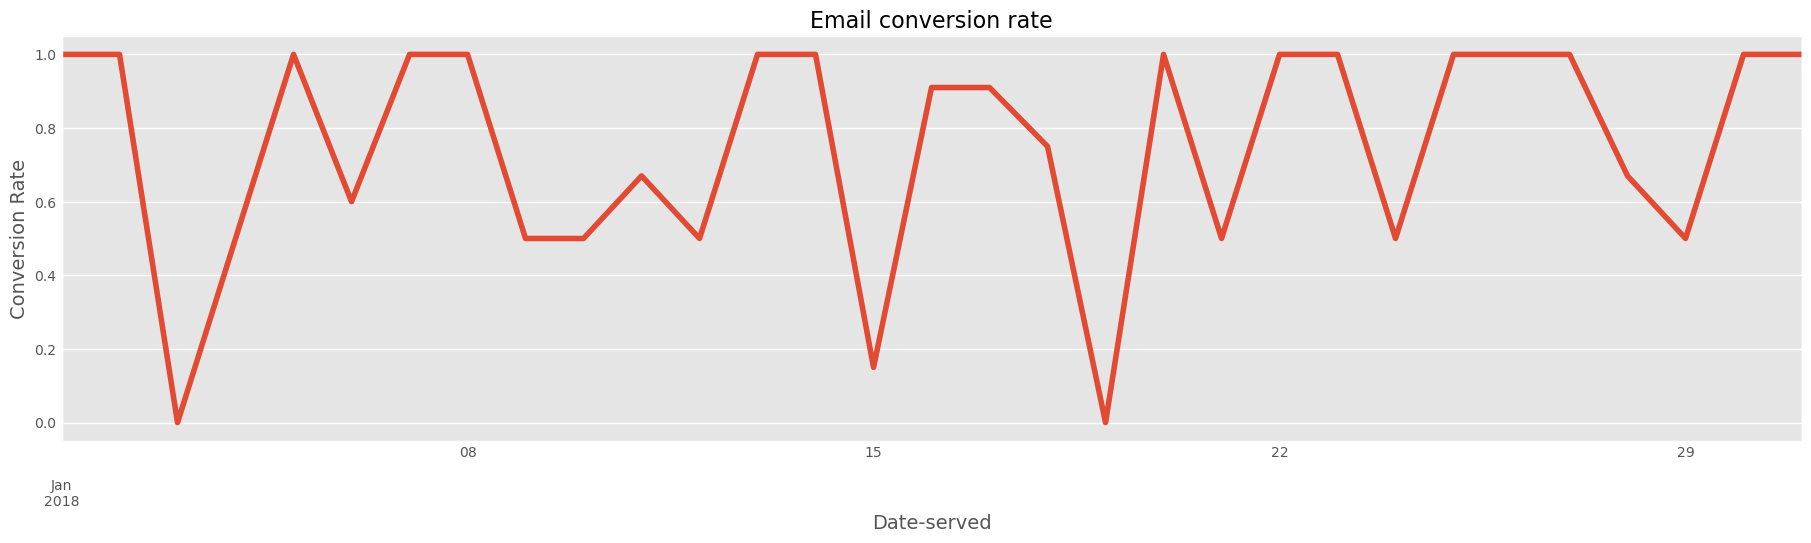

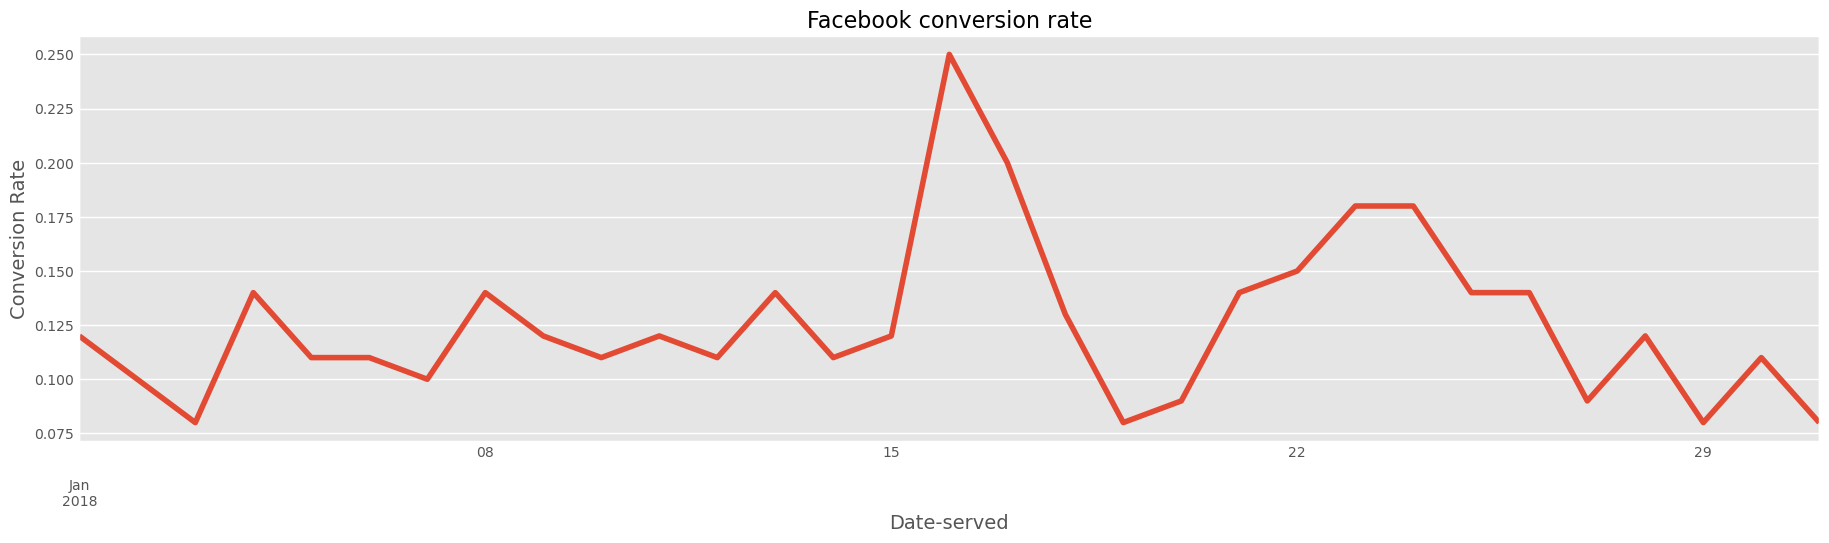

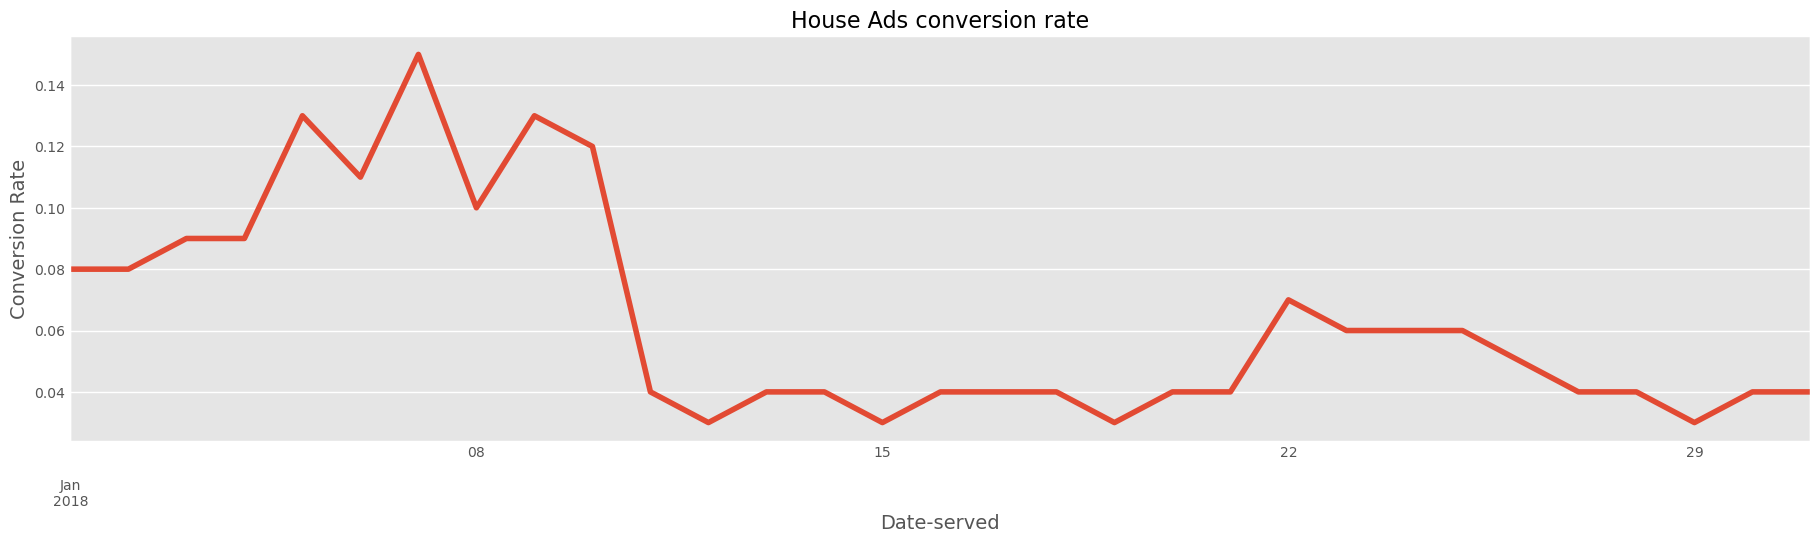

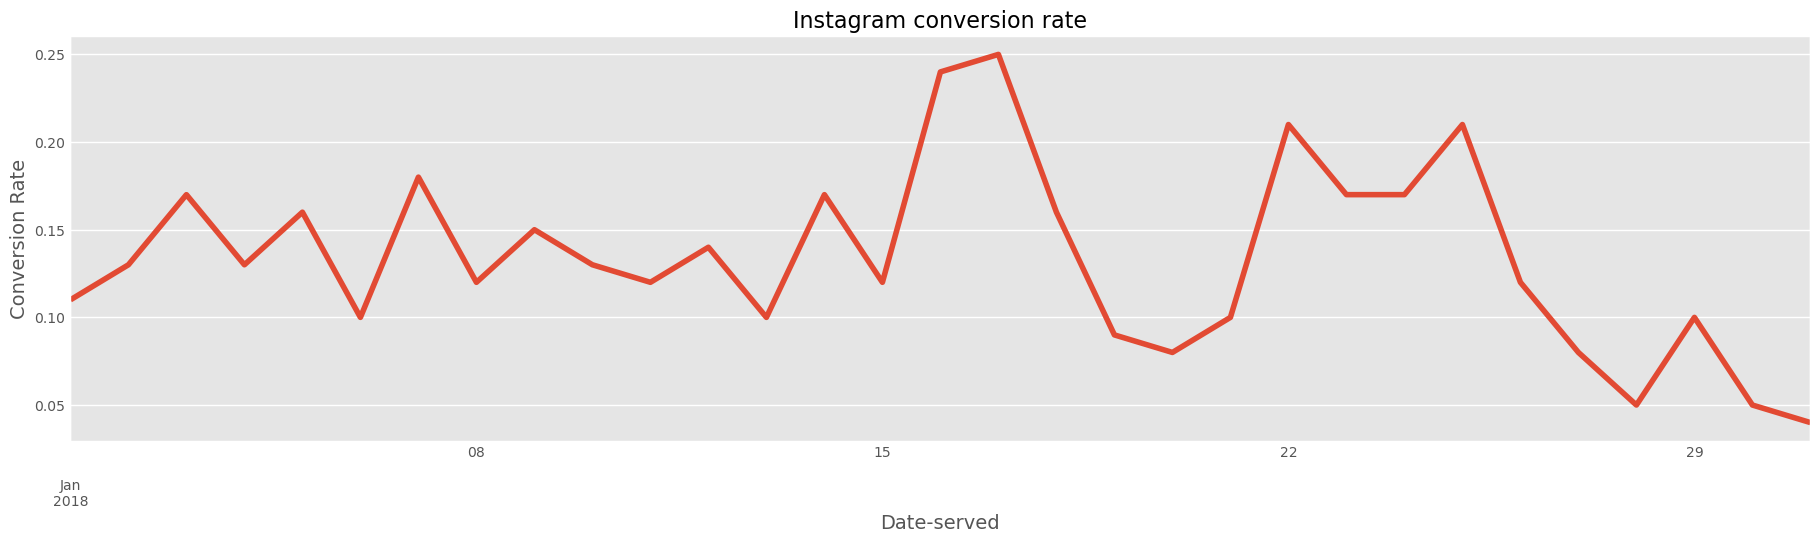

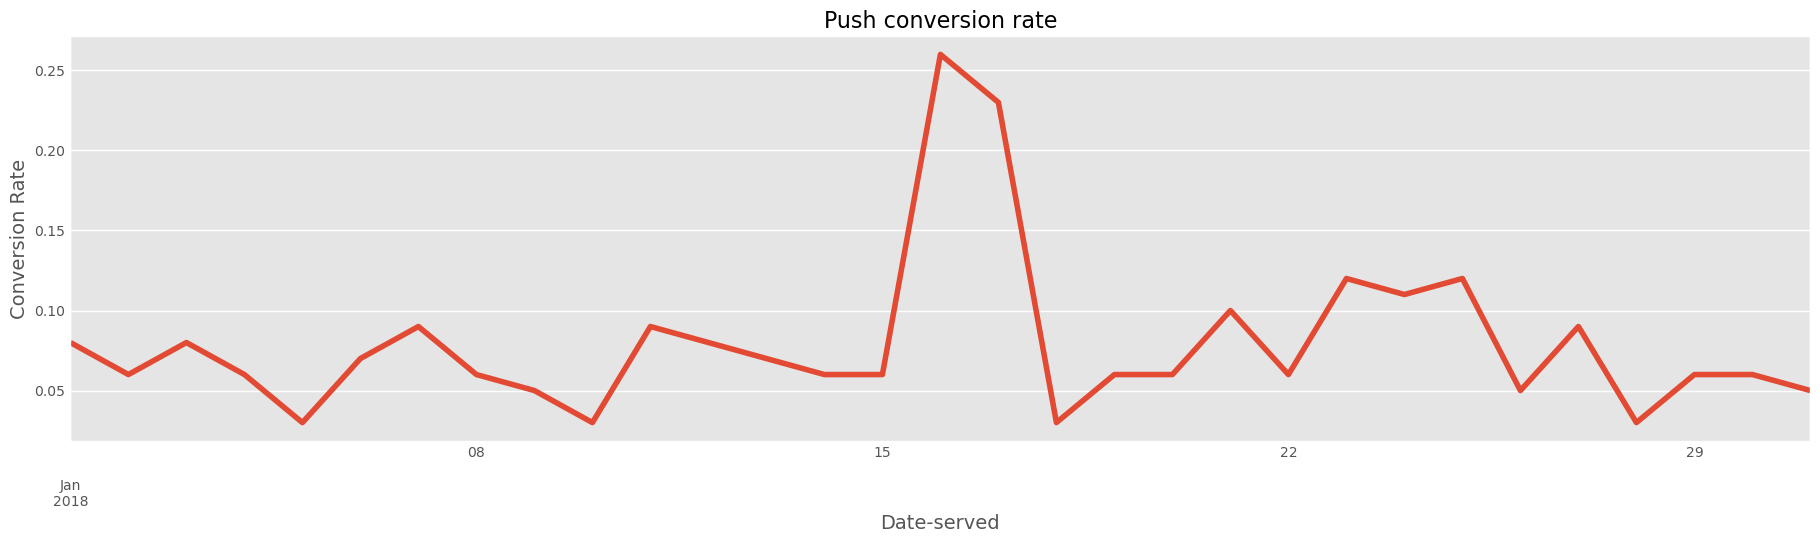

In [252]:
plotting_conv(channel_conv_df,'line')

- All channels excep house ads have high daily fluctuations in coversion rates


- **House ads conversions have gone down drastically after 10th, needs to be investigated**

## Plotting conversin rate by Age

In [253]:
age_group_conv_df=pd.DataFrame(conversion_rate(df,['date_served','age_group']).unstack(level=1))
# age_group_conv_df

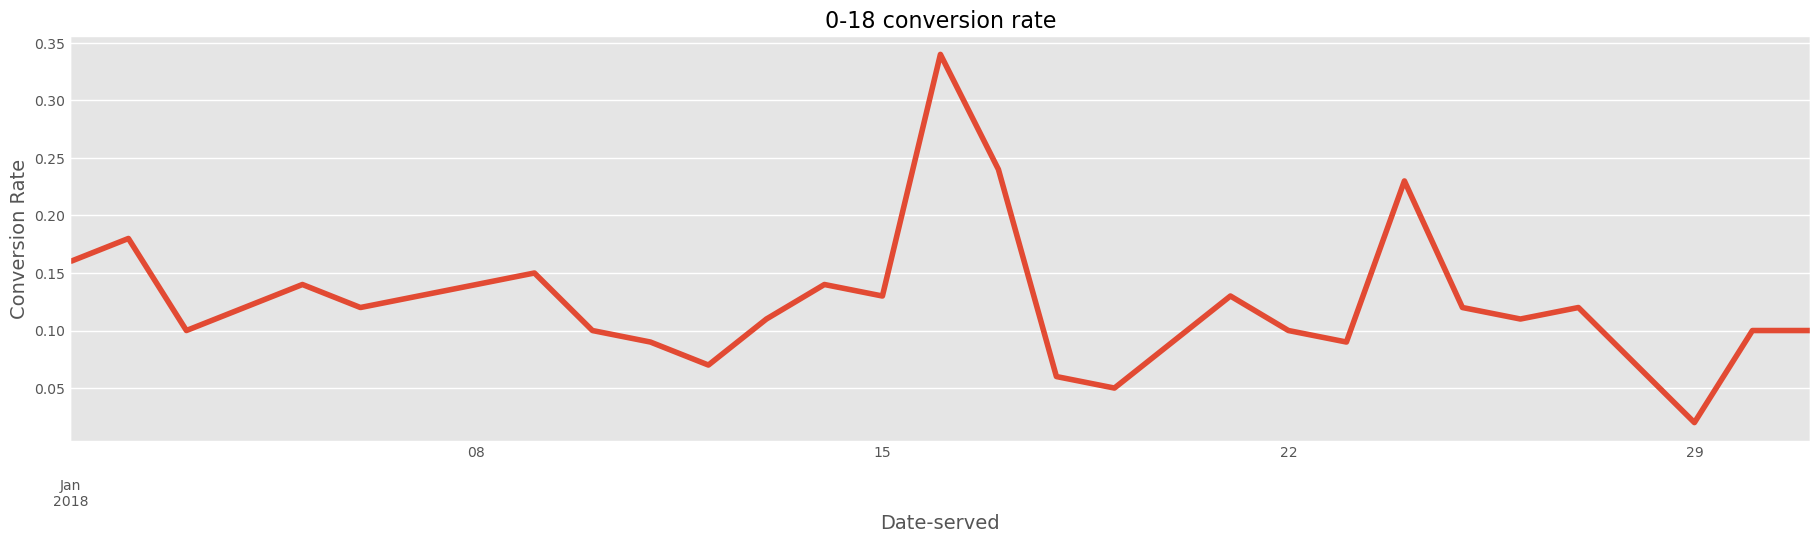

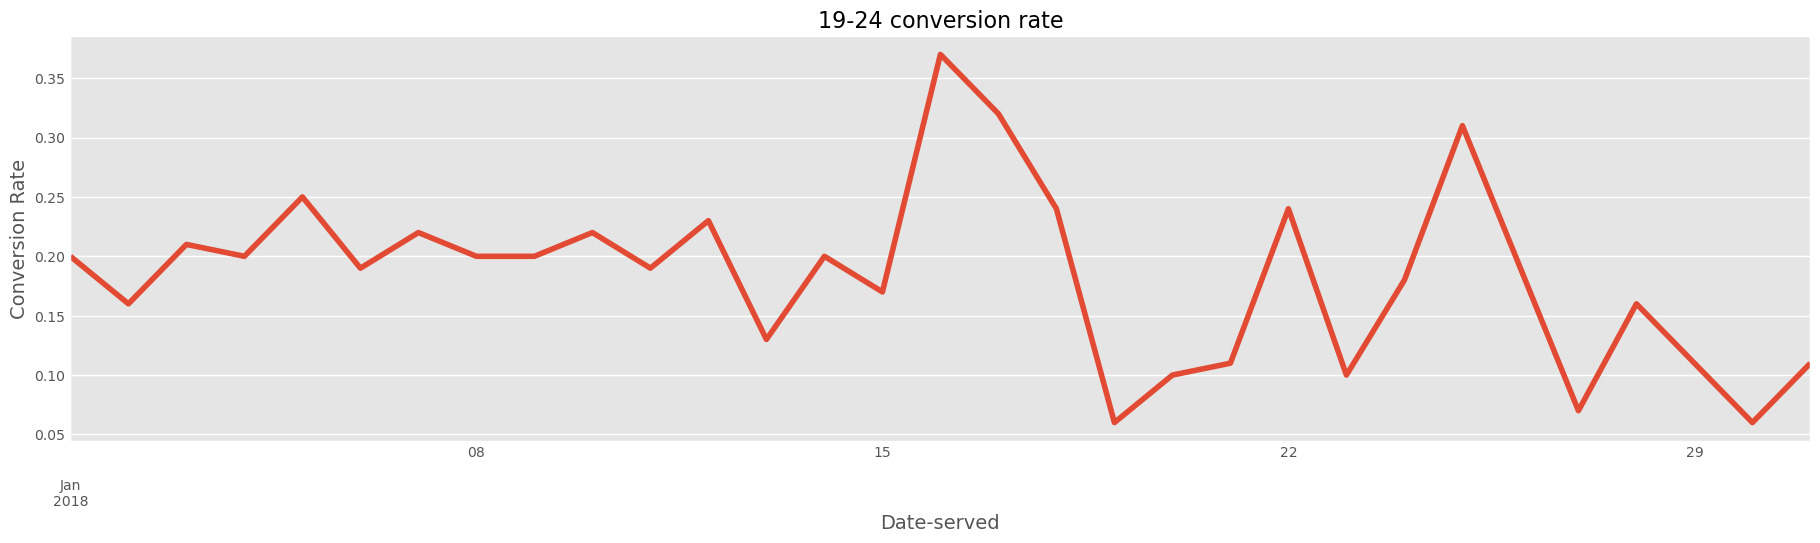

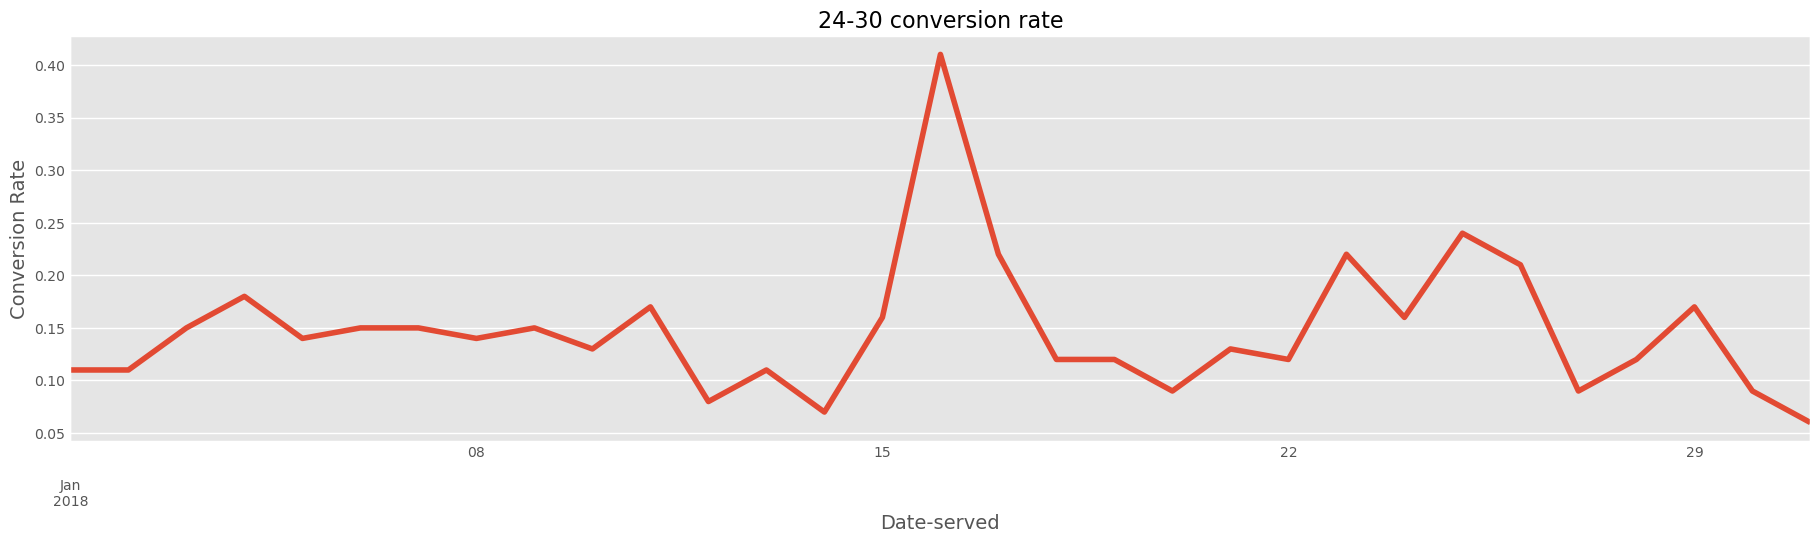

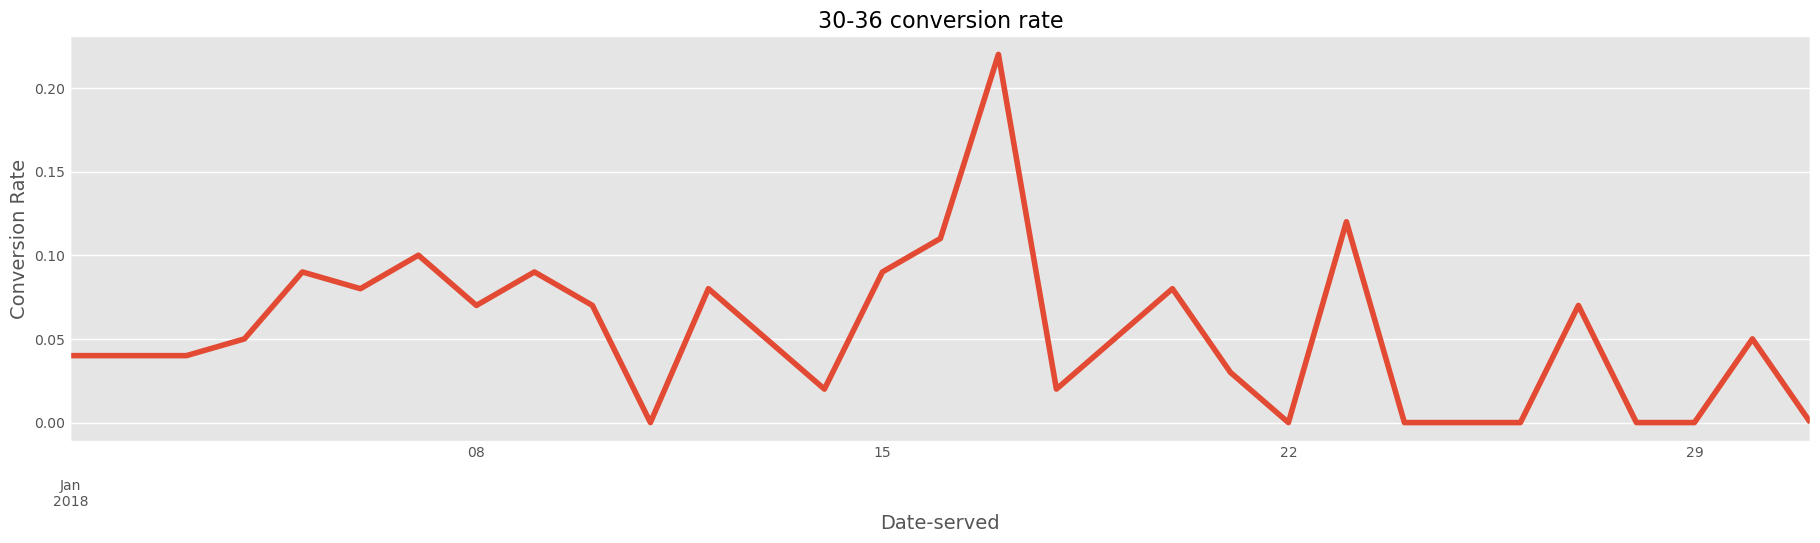

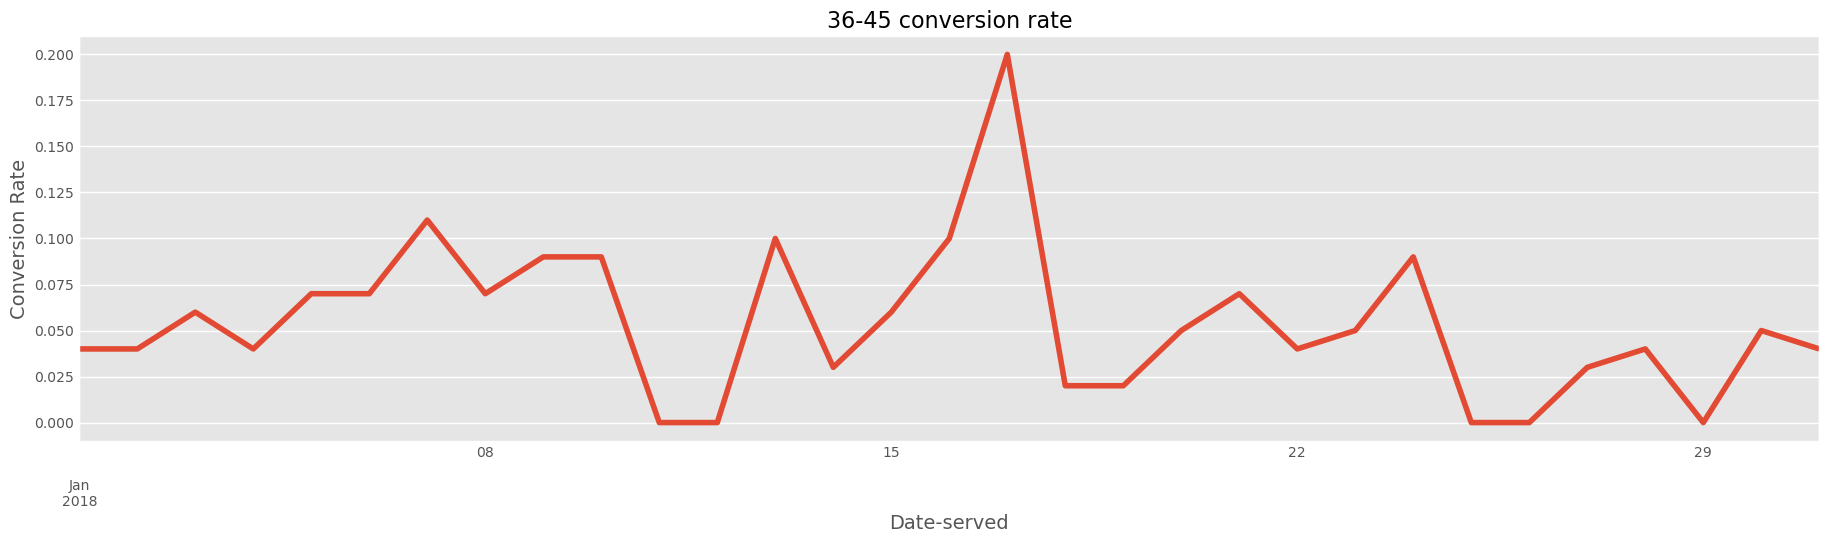

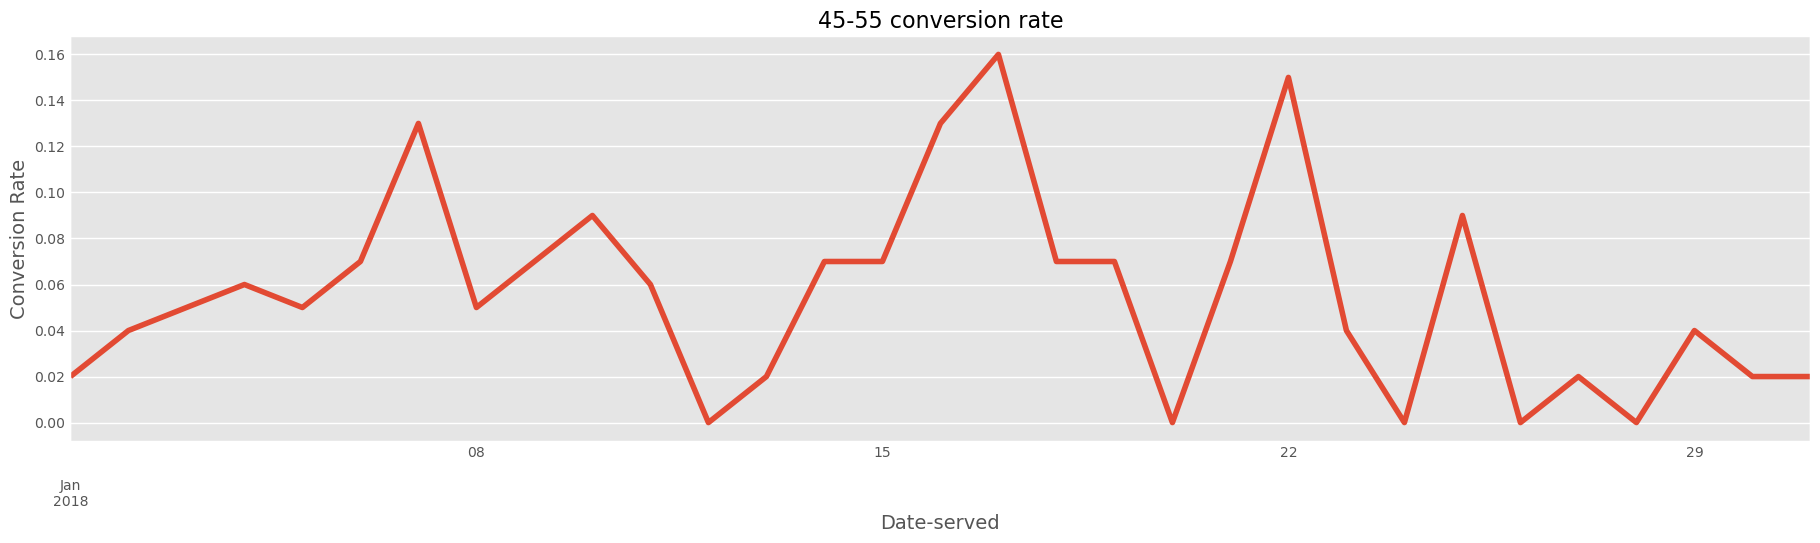

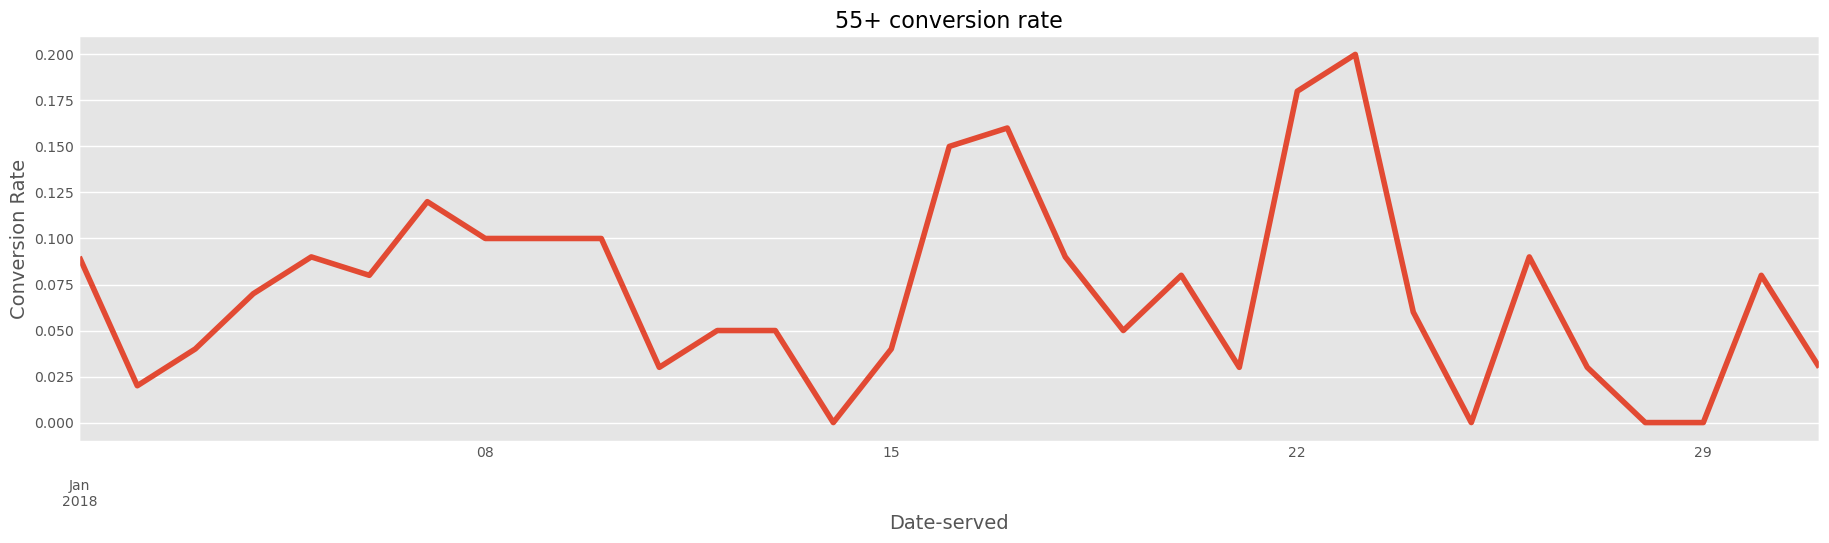

In [254]:
plotting_conv(age_group_conv_df, 'line')

- Each age group has spike in conversion around 16th 


- This is driven by FB, Insta and Push Ads as these channels had spike at the same time

## Days of week

In [255]:
df['DOW_served'] = df['date_served'].dt.day_of_week
df['DOW_served']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    4.0
10035    2.0
10036    5.0
Name: DOW_served, Length: 10037, dtype: float64

In [256]:
DOW_conversion_df = pd.DataFrame(conversion_rate(df,['DOW_served', 'marketing_channel']).unstack(level=1))
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DOW_served,,,,,
0.0,0.16,0.12,0.06,0.12,0.06
1.0,0.91,0.15,0.07,0.15,0.12
2.0,0.84,0.13,0.08,0.15,0.11
3.0,0.73,0.13,0.06,0.14,0.07
4.0,0.67,0.11,0.06,0.13,0.06
5.0,0.82,0.11,0.06,0.09,0.07
6.0,0.75,0.12,0.07,0.13,0.07


In [257]:
map_dict= {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri',5.0: 'Sat',6.0: 'Sun'}
DOW_conversion_df['day']  = DOW_conversion_df.index.map(map_dict)
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push,day
DOW_served,,,,,,
0.0,0.16,0.12,0.06,0.12,0.06,Mon
1.0,0.91,0.15,0.07,0.15,0.12,Tue
2.0,0.84,0.13,0.08,0.15,0.11,Wed
3.0,0.73,0.13,0.06,0.14,0.07,Thu
4.0,0.67,0.11,0.06,0.13,0.06,Fri
5.0,0.82,0.11,0.06,0.09,0.07,Sat
6.0,0.75,0.12,0.07,0.13,0.07,Sun


In [258]:
DOW_conversion_df.set_index(DOW_conversion_df['day'],inplace=True)
DOW_conversion_df ## lets remvoe the day column

marketing_channel,Email,Facebook,House Ads,Instagram,Push,day
day,,,,,,
Mon,0.16,0.12,0.06,0.12,0.06,Mon
Tue,0.91,0.15,0.07,0.15,0.12,Tue
Wed,0.84,0.13,0.08,0.15,0.11,Wed
Thu,0.73,0.13,0.06,0.14,0.07,Thu
Fri,0.67,0.11,0.06,0.13,0.06,Fri
Sat,0.82,0.11,0.06,0.09,0.07,Sat
Sun,0.75,0.12,0.07,0.13,0.07,Sun


In [259]:
DOW_conversion_df.drop(columns='day', inplace=True)
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
day,,,,,
Mon,0.16,0.12,0.06,0.12,0.06
Tue,0.91,0.15,0.07,0.15,0.12
Wed,0.84,0.13,0.08,0.15,0.11
Thu,0.73,0.13,0.06,0.14,0.07
Fri,0.67,0.11,0.06,0.13,0.06
Sat,0.82,0.11,0.06,0.09,0.07
Sun,0.75,0.12,0.07,0.13,0.07


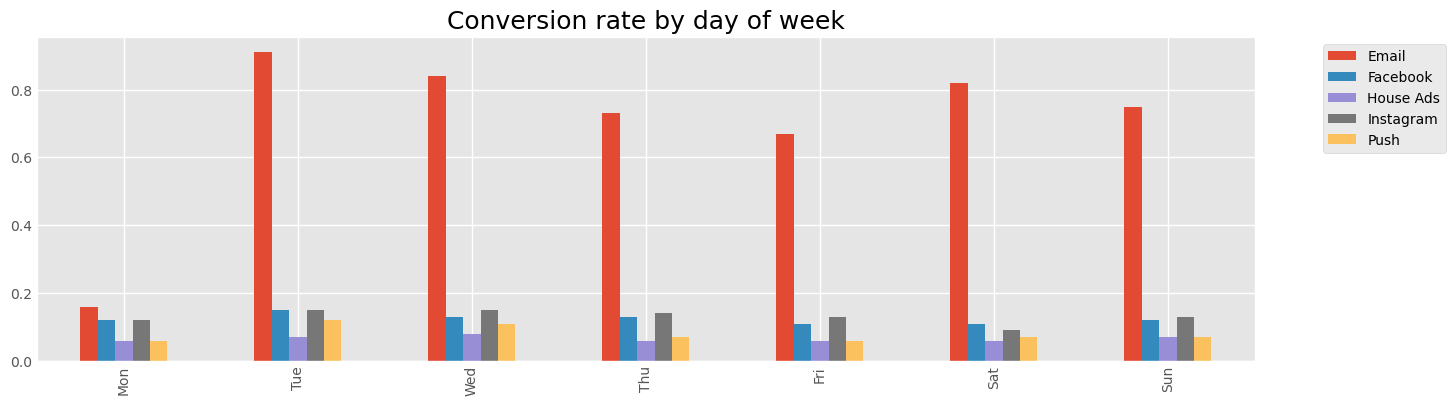

In [260]:
DOW_conversion_df.plot(kind="bar",figsize=(14,4))
plt.title('Conversion rate by day of week',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

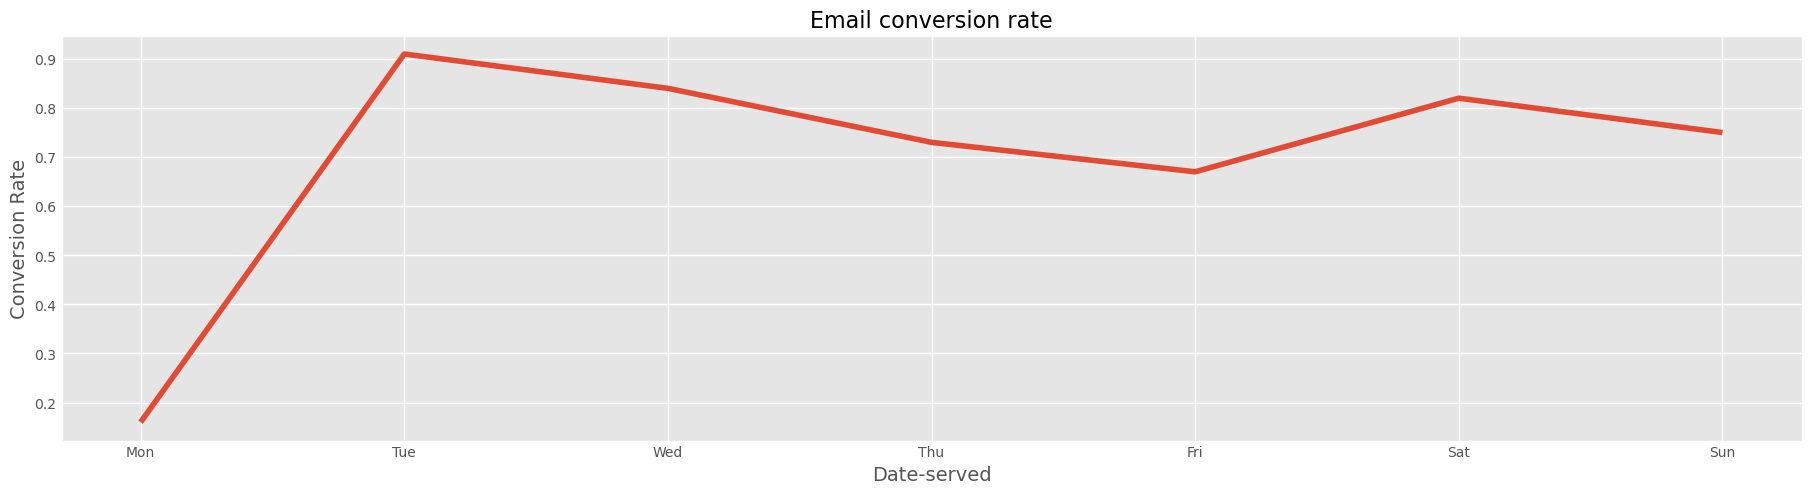

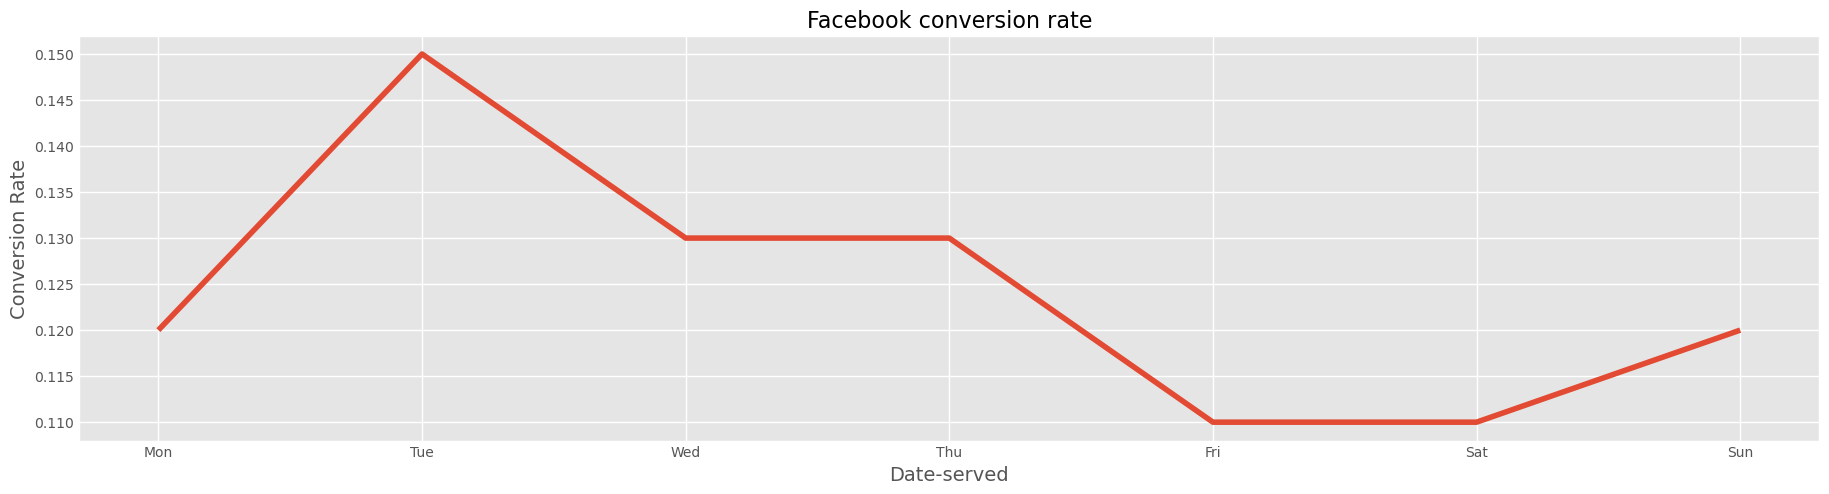

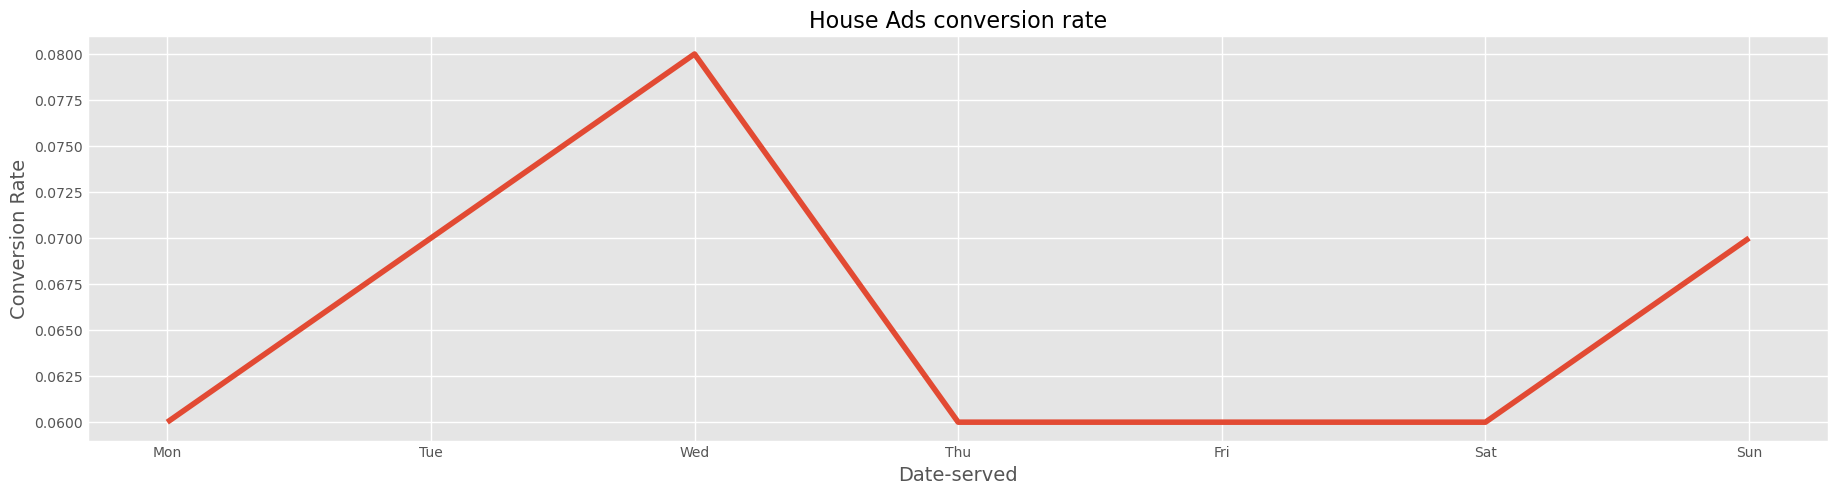

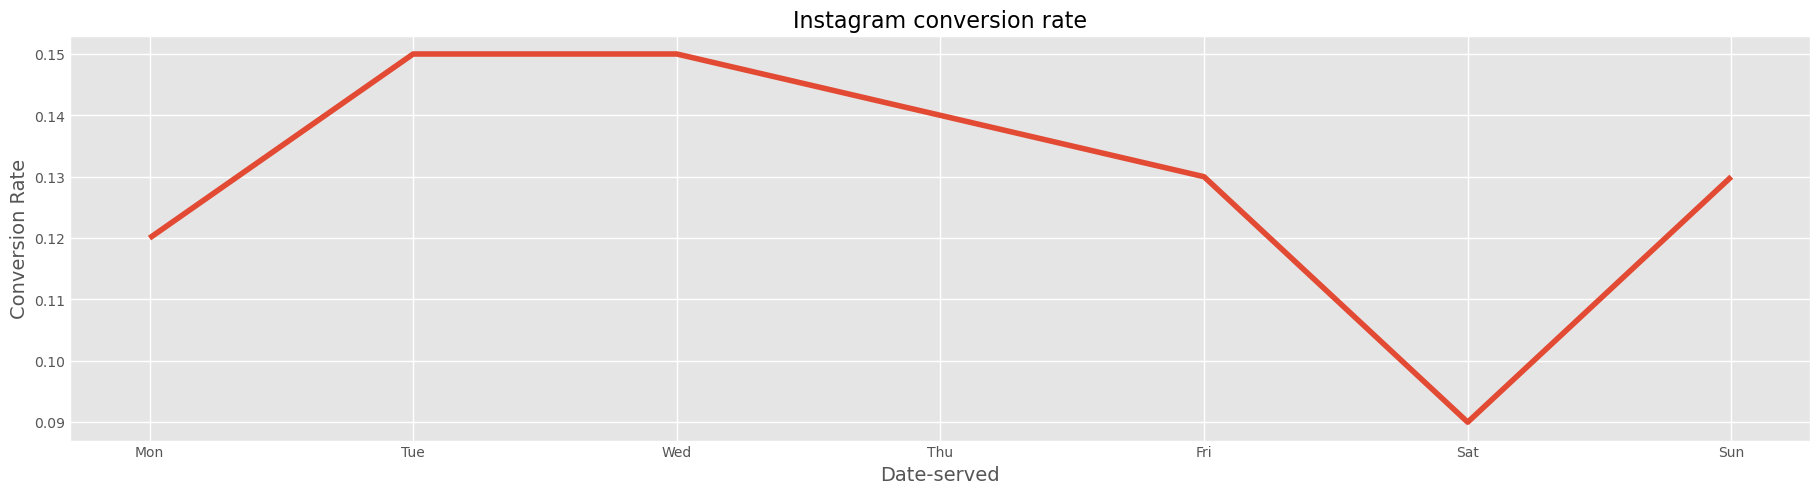

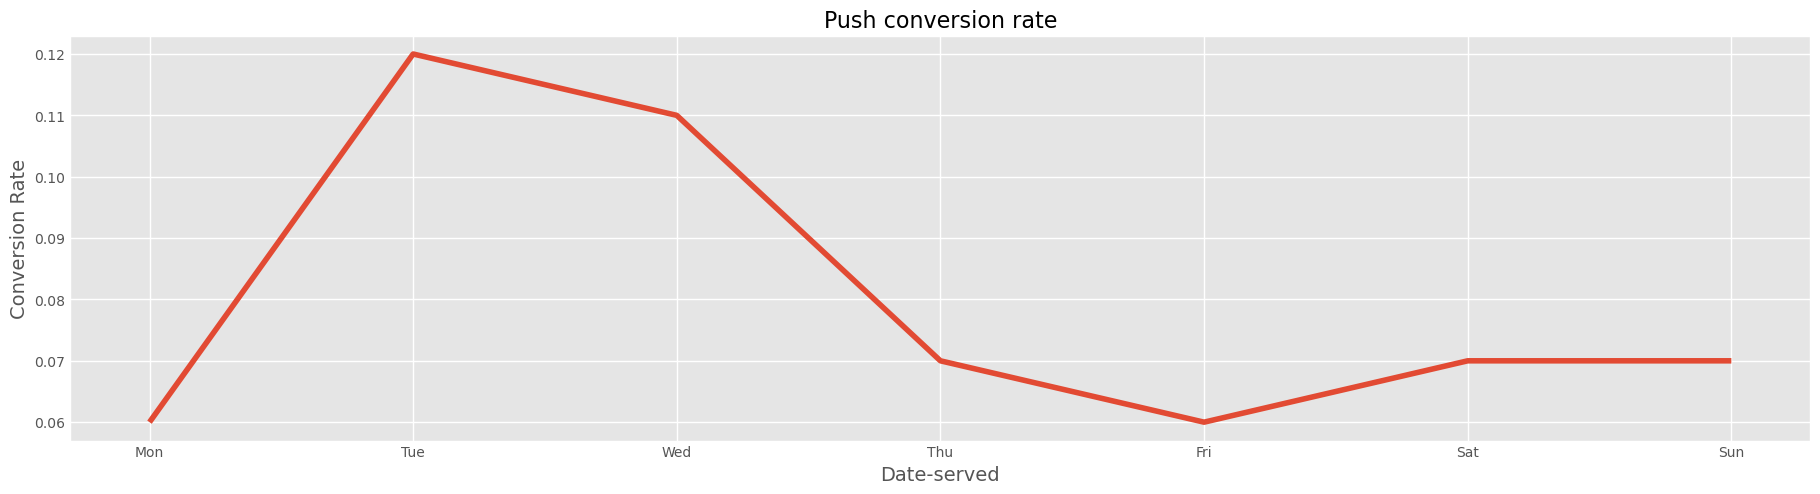

In [261]:
plotting_conv(DOW_conversion_df,'line')

**House ads conversion rate**

The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's our responsibility to determine whether these changes are natural fluctuations or if they require further investigation.

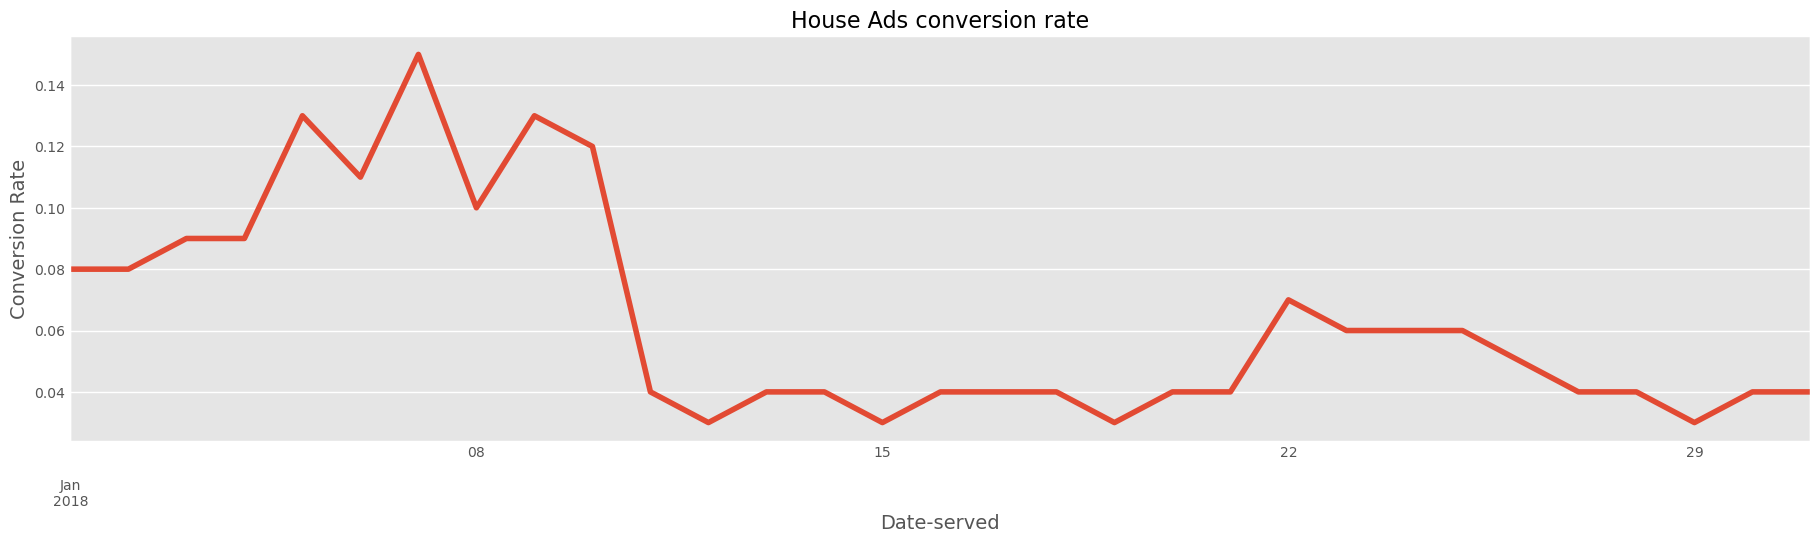

In [262]:
plotting_conv(pd.DataFrame(channel_conv_df['House Ads']),'line')

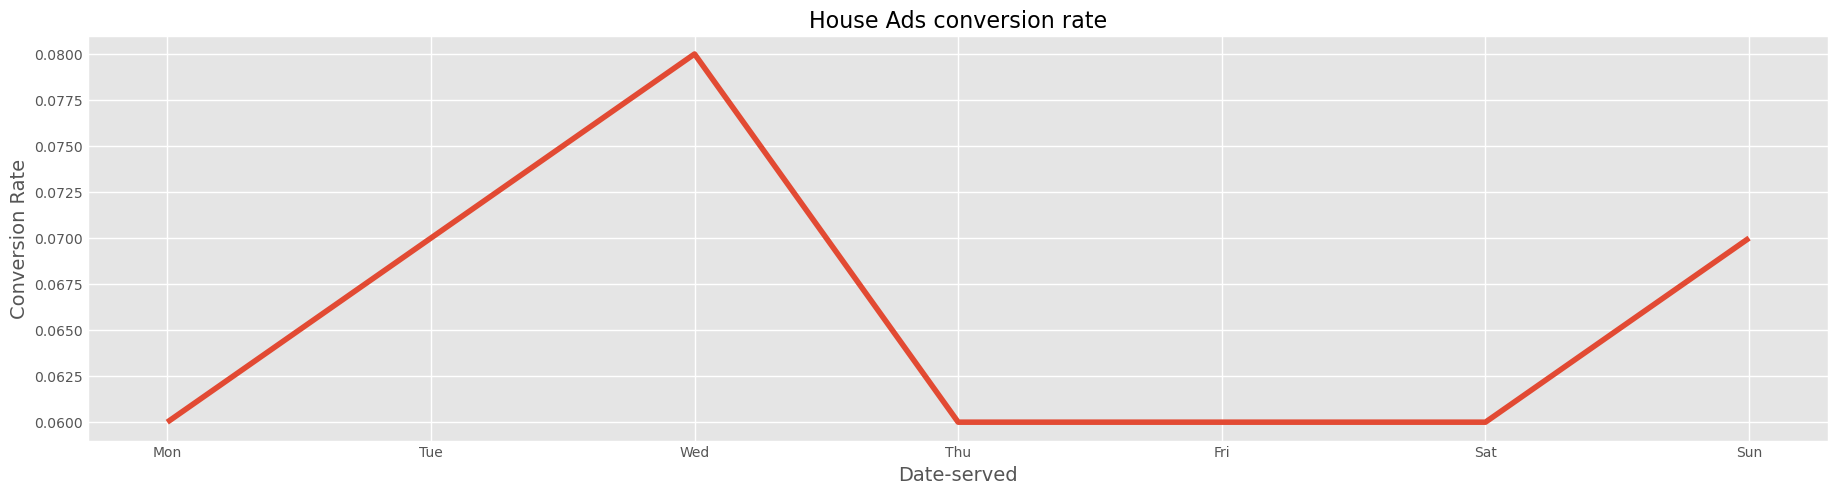

In [263]:
plotting_conv(pd.DataFrame(DOW_conversion_df['House Ads']),"line")

**Analysing House ads conversion rate**

House ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

It's vital to identify if the fluctuations are due to shifts in user behavior (i.e., differences across the day of the week or time of the month) versus a some problem in technical implementation or marketing strategy.

In [264]:
conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [265]:
idx = pd.IndexSlice
conversion_df.loc[idx[:,'House Ads'], :] # after taking all rows where 2nd index ( marketing channel is House Ads) | usiing loc we get all columns [:]
# this code will help us view House ads seprately 

,,conversions,ads_served,conversion_rate
variant,marketing_channel,,,
control,House Ads,172.0,2552,0.07
personalization,House Ads,126.0,2181,0.06


We can see both groups has same low conversion rate

In [272]:
## weekday vs weekend house ads comparsion

house_ads_df = pd.DataFrame(channel_conv_df['House Ads'])
house_ads_df.reset_index(inplace=True)

house_ads_df['DOW'] = house_ads_df['date_served'].dt.day_of_week

house_ads_df.head()



,date_served,House Ads,DOW
0,2018-01-01,0.08,0
1,2018-01-02,0.08,1
2,2018-01-03,0.09,2
3,2018-01-04,0.09,3
4,2018-01-05,0.13,4


In [274]:
house_ads_df['day type'] = house_ads_df['DOW'].apply(lambda x: 'Weekday' if x > 4 else 'Weekend')
house_ads_df.head()

,date_served,House Ads,DOW,day type
0,2018-01-01,0.08,0,Weekend
1,2018-01-02,0.08,1,Weekend
2,2018-01-03,0.09,2,Weekend
3,2018-01-04,0.09,3,Weekend
4,2018-01-05,0.13,4,Weekend


In [279]:
print('Conversion Rate for House ads')
print(house_ads_df.groupby('day type')['House Ads'].mean())

Conversion Rate for House ads
day type
Weekday    0.062500
Weekend    0.064348
Name: House Ads, dtype: float64


No real difference in weekday vs weekend house ads conv rates

## House ads conversion by language

Now that its clear that there are no natural fluctuations across the day of the week lets check if language was correctly shown as per the target user preferences.

Perhaps the new marketing campaign does not apply broadly across different cultures.

In [289]:
house_ads_df = df[df['marketing_channel'] == 'House Ads']
# house_ads_df

print(f'Total house ads {len(house_ads_df)}')
wrong_lang = house_ads_df['language_displayed'] != house_ads_df['language_preferred']
# wrong_lang
correct_lang = house_ads_df['language_displayed'] == house_ads_df['language_preferred']

print(f'House ads with wrong langauge: {sum(wrong_lang)}')
print(f'House ads with correct langauge: {sum(correct_lang)}')
print(f"House ads converions: { house_ads_df['converted'].sum() }") ## both sum(x) (python class) and x.sum (pandas) are same

Total house ads 4733
House ads with wrong langauge: 453
House ads with correct langauge: 4280
House ads converions: 298.0


In [294]:
house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)

house_ads_df.head()

C:\Users\SuryaMurugan\AppData\Local\Temp\ipykernel_27948\3861044005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW_subscribed,is_language_correct,DOW_served
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,Yes,0.0


In [303]:
house_ads_lang_df = house_ads_df.groupby(['date_served', 'is_language_correct'])['user_id'].count().unstack(level=1)
house_ads_lang_df.head()

is_language_correct,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,NaN,220.0
2018-01-04,NaN,168.0
2018-01-05,NaN,160.0


In [308]:
house_ads_lang_df.fillna(0, inplace=True)
house_ads_lang_df['Correct %'] = 100* house_ads_lang_df['Yes'] / (house_ads_lang_df['No'] + house_ads_lang_df['Yes'])
house_ads_lang_df.round()

is_language_correct,No,Yes,Correct %
date_served,,,
2018-01-01,2.0,189.0,99.0
2018-01-02,3.0,247.0,99.0
2018-01-03,0.0,220.0,100.0
2018-01-04,0.0,168.0,100.0
2018-01-05,0.0,160.0,100.0
2018-01-06,1.0,151.0,99.0
2018-01-07,2.0,130.0,98.0
2018-01-08,0.0,154.0,100.0
2018-01-09,0.0,157.0,100.0


Setting up conversion indexes

its clear that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

Bug occured on 11th, so conv rate from 1st to 10th should be considered

In [317]:
house_ads_no_bug = house_ads_df[ house_ads_df['date_served'] < '2018-01-11']
conv_rates = conversion_rate(house_ads_no_bug,['language_preferred'])
conv_rates_df = pd.DataFrame(conv_rates)
conv_rates_df.reset_index(inplace=True)
conv_rates_df.columns = ['Language', 'Conversion_rate']
conv_rates_df

,Language,Conversion_rate
0,Arabic,0.50
1,English,0.10
2,German,0.44
3,Spanish,0.16


In [320]:
house_ads_no_bug.groupby('language_preferred')['converted'].sum()

language_preferred
Arabic       7.0
English    142.0
German      12.0
Spanish     17.0
Name: converted, dtype: float64

In [322]:
house_ads_no_bug.groupby('language_preferred')['converted'].count()

language_preferred
Arabic       14
English    1592
German       31
Spanish     117
Name: converted, dtype: int64

In [329]:
#finding if languae was correct what would have been conv rate
house_ads_lang_counts = pd.DataFrame(house_ads_df.groupby('language_preferred')['user_id'].count())
house_ads_lang_counts.reset_index(inplace=True)
house_ads_lang_counts.columns=['Language','Ad_count']
house_ads_lang_counts

,Language,Ad_count
0,Arabic,107
1,English,4112
2,German,112
3,Spanish,402


In [330]:
house_ads_lang_counts['Expected_Conversion_Count'] = house_ads_lang_counts['Ad_count'] * conv_rates_df['Conversion_rate']
house_ads_lang_counts

,Language,Ad_count,Expected_Conversion_Count
0,Arabic,107,53.50
1,English,4112,411.20
2,German,112,49.28
3,Spanish,402,64.32


In [333]:
toal_count_noBug = house_ads_lang_counts['Expected_Conversion_Count'].sum().round()
print(f"Without bug house ads would have converted: {toal_count_noBug}")

Without bug house ads would have converted: 578.0


In [342]:
# Hosue ads - no bugs langauge_preferred value counts()
len(house_ads_no_bug.loc[(house_ads_no_bug['language_preferred']== 'English') & house_ads_no_bug['converted'] ==1])

142

# A/B Testing

Test allocation

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.



In [344]:
email_df = df[df['marketing_channel'] == 'Email']

In [345]:
email_df['variant'].value_counts()

variant
personalization    291
control            274
Name: count, dtype: int64

Comparing conversion rates

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

The DataFrame email has been loaded in your workspace which contains only rows from the marketing DataFrame where marketing_channel is 'Email'.

In [351]:
subscribers = email_df.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1))
# subscribers_df

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

In [352]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


**Creating a lift function**

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:


**Treatment conversion rate - Control conversion rate**

The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

Calculate the mean of a and b using np.mean().

Use a_mean and b_mean to calculate the lift of the treatment.

Print the results of the lift() function you created using the control and personalization variables.

In [358]:
lift = ( np.mean(personalization) - np.mean(control) ) / np.mean(control)
# lift = (lift*100).round()
lift = round(lift*100)
print(f"Lift is {lift}%")

Lift is 39%


Is this lift stat significant?

In [360]:
from scipy import stats

In [363]:
# A two sample T-test is used to compare the means of two seprate samples.

stats.ttest_ind(control, personalization)

TtestResult(statistic=-2.734329944750507, pvalue=0.006451487844694182, df=552.0)

#### Create a sub segment function for hypothesis testing

In [381]:
def ab_segmentation(channel, subsegment=None):

    if subsegment is None:

        subsegment_df = df[df['marketing_channel']== channel]

        subscribers = subsegment_df.groupby(['user_id','variant'])['converted'].max()

        subscribers_df = pd.DataFrame(subscribers.unstack(level=1))

        control = subscribers_df['control'].dropna()

        personalization =  subscribers_df['personalization'].dropna()

        lift = ( np.mean(personalization) - np.mean(control)) / np.mean(control)
        
        print("lift: {}%".format(round(lift*100)))
        t_test = stats.ttest_ind(control, personalization)

        print(f"t-statistic: {t_test} \n\n")

    else:

        for value in np.unique(df[subsegment].values):

            print(value)

            subsegment_df = df[ (df['marketing_channel'] == channel) & ( df[subsegment] == value)]

            subscribers = subsegment_df.groupby(['user_id','variant'])['converted'].max()
            subscribers_df = pd.DataFrame(subscribers.unstack(level=1))

            control = subscribers_df['control'].dropna()
            personalization = subscribers_df['personalization'].dropna()

            lift = ( np.mean(personalization) - np.mean(control)) / np.mean(control)

            print("lift: {}%".format(round(lift*100)))
            t_test = stats.ttest_ind(control, personalization)

            print(f"Count of control & personalization: {len(control)} & {len(personalization)}")
            print(f"t-statistic: {t_test} \n\n")


In [382]:
ab_segmentation('Email')

lift: 39%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.006451487844694182, df=552.0) 




In [385]:
## lets check for each language displayed
ab_segmentation("Email" ,"language_displayed")

Arabic
lift: 50%
Count of control & personalization: 5 & 5
t-statistic: TtestResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001, df=8.0) 


English
lift: 39%
Count of control & personalization: 240 & 248
t-statistic: TtestResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503, df=486.0) 


German
lift: -2%
Count of control & personalization: 17 & 27
t-statistic: TtestResult(statistic=0.19100834180787182, pvalue=0.8494394170062677, df=42.0) 


Spanish
lift: 167%
Count of control & personalization: 8 & 4
t-statistic: TtestResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524, df=10.0) 




c:\Users\SuryaMurugan\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [386]:
# Next lets check Instagram
ab_segmentation("Instagram")

lift: 380%
t-statistic: TtestResult(statistic=-10.74963558513612, pvalue=3.6595188397778783e-26, df=1793.0) 




In [388]:
ab_segmentation("Instagram","age_group")

0-18
lift: 532%
Count of control & personalization: 125 & 168
t-statistic: TtestResult(statistic=-4.420030279559059, pvalue=1.3945853816242439e-05, df=291.0) 


19-24
lift: 1007%
Count of control & personalization: 115 & 187
t-statistic: TtestResult(statistic=-8.919549191849601, pvalue=4.71470086122104e-17, df=300.0) 


24-30
lift: 542%
Count of control & personalization: 125 & 146
t-statistic: TtestResult(statistic=-5.770186139845332, pvalue=2.174138604598001e-08, df=269.0) 


30-36
lift: 171%
Count of control & personalization: 145 & 107
t-statistic: TtestResult(statistic=-1.7419217331973267, pvalue=0.08275202630134186, df=250.0) 


36-45
lift: 145%
Count of control & personalization: 160 & 109
t-statistic: TtestResult(statistic=-1.8514991272922312, pvalue=0.06520183209266825, df=267.0) 


45-55
lift: 21%
Count of control & personalization: 114 & 106
t-statistic: TtestResult(statistic=-0.4071322043730024, pvalue=0.6843103638809036, df=218.0) 


55+
lift: -39%
Count of control & perso

#### We have Succesfully Anlyzed the Marketing Campaign data and share our Insights to the team, From next month we must revisit and check the progress for each channel